# Rudiments of programming in R

Let’s begin with a basic introduction to working with R.

If you don't already have R installed on your computer, you can get it [here](https://cran.rstudio.com/).

You probably don't need to concern yourself with this, but just to ensure reproducibility and for my own info if I reuse some of these exercises later, here's what I'm working with:

In [203]:
print(R.version)

               _                           
platform       x86_64-apple-darwin17.0     
arch           x86_64                      
os             darwin17.0                  
system         x86_64, darwin17.0          
status                                     
major          4                           
minor          2.0                         
year           2022                        
month          04                          
day            22                          
svn rev        82229                       
language       R                           
version.string R version 4.2.0 (2022-04-22)
nickname       Vigorous Calisthenics       


## RStudio

For this workshop we’re going to be using [RStudio](https://www.rstudio.com), a popular integrated development environment for R. RStudio is a separate application layered on top of R that gives you a nice, organized workspace in which to manage your projects. 

If you don't have RStudio already, you can download it for free [here](https://www.rstudio.com/products/rstudio/download/#download).

### Finding your way around RStudio

Here's an example of an open session in RStudio:

![RStudio Overview](img/rstudio_overview.png)

The screen here is divided into four panes. You have a lot of flexibility, but here's how I'm using them:

### Console

In the lower-left, I have the **console** open. This is my direct connection to R: any expressions I enter here will be evaluated right away and the results will be printed out.

![RStudio Console](img/rstudio_console.png)

### Editor

In the upper-left, I have an **editor**. This pane lets me work on and save R scripts that I want to run later. I can use shortcuts to run short sections of my code right now in the console, to see how they work, or to run the whole script at once.

![RStudio Editor](img/rstudio_editor.png)

### Environment

In the upper-right, I like to have the **environment** pane open. This shows me what's stored in R’s memory as I’m working: for examples any functions I’ve defined or the values of variables. If I want to inspect something a bit more complicated, like a table of values, it will be shown in the upper-left pane.

![RStudio Environment](img/rstudio_environment.png)

### Plots & Help

In the lower-right is a space for displaying plots that you might draw of your data. If you look up the built-in help for a function, it will be displayed here as well. I use this feature a lot!

![RStudio Plots](img/rstudio_plots.png)

## Workflow

When I’m working on a project in R, I generally start by creating a folder to contain everything to do with the project. Often I’ll organize data, scripts, and documentation in separate subfolders. When I start RStudio, I’ll select the project folder using "File"  →
"Open Project". 

I usually create a new script for each stage or step of the work, often with filenames like `0_preprocessing.R`, `1_data_analysis.R`, `2_plots.R`, etc., that help me remember what order the tasks are supposed to be run in.

I’ll have these files open in the editor, and as I’m writing the code there, I’m simultaneously trying it out over and over in the console to fix the bugs. Every so often, when I’ve reached a checkpoint I’ve set myself and things seem to be working, I’ll re-start R or wipe the enivornment clean (look for the broom icon) and try running my script from the beginning. Eventually, I hit a snag and have to pick up where I left off, with trial and error.

With this process, I incrementally build up the project in stages, frequently confirming that my results are reproducible.

When I’ve reached a good stopping point, ideally one where things work, I’ll back up my work using a [git](https://git-scm.com/) commit. Version control is a bit beyond the scope of this workshop, but it’s built into RStudio if you want to use it (look under the "Tools" menu).

## First steps with R

Let's get started with some code! Type the following statements into the console and press enter to make R evaluate them:

In [9]:
5 + 1

[1] 6

In [10]:
9 * 9

[1] 81

In [13]:
1:10

[1]  1  2  3  4  5  6  7  8  9 10

In [16]:
seq(from=0, to=10, by=2)

[1]  0  2  4  6  8 10

In [17]:
seq(from=0, to=10, by=2) + 5

[1]  5  7  9 11 13 15

Ok, let’s stop for a second to look at what happened with that last one. We’ve hit on one of the principal strengths of R, here: **vector operations**.

R is really good at working with sequences and tables of data, often making it simple to express operations that in other languages would need some kind of explicit loop. In the line above, `seq(from=0, to=10, by=2)` produces a **vector**, a sequence of data all having the same type, in this case, a sequence of integers. (Actually, `5` is a vector, too, a sequence of length 1.)

When tell R to add these two vectors together, it assumes we want to add them element by element along their entire length. The shorter vector, `5`, is **recycled** along the length of the longer vector.

So we end up with

`0, 2, 4, 6, 8, 10` + `5, 5, 5, 5, 5, 5`,

that is,

`0 + 5`, `2 + 5`, `4 + 5`, `6 + 5`, `8 + 5`, `10 + 5`

which evaluates to

`5, 7, 9, 11, 13, 15`

### More examples:

In [19]:
1:10 * 2

[1]  2  4  6  8 10 12 14 16 18 20

In [20]:
seq(from=0, to=10, by=1) + seq(from=10, to=0, by=-1)

[1] 10 10 10 10 10 10 10 10 10 10 10

### Create your own vector

You can generate sequences of numbers in a couple of different ways.

`seq()` allows you to specify start, end, and step values, as we saw above. The colon notation (e.g. `5:10`) is a handy shortcut if you're counting by ones.

For repeating sequences, use `rep()`:

In [160]:
rep(0, times=20)

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

You can create arbitrary vectors by joining a sequence of values using the **combine** function, `c()`.

In [161]:
c(1, 0, 9, 4, 3, 2, 5, 7)

[1] 1 0 9 4 3 2 5 7

<div class="alert alert-info">
    
**💁🏻‍♂️ What are the pros and cons of this style of programming for us as humanists?**
    
Well, a programming language that natively treats things as sequences makes a lot of sense for me as someone who studies epic poetry. I might want to consider Homer’s *Iliad* as a sequence of verse lines, or sentences, or words, or letters, or sounds, for example.

If your program involves doing some operation over and over again, transforming one list of values into a new list of values, then there’s a good chance it’s a one-liner in R. To put it another way, it’s generally considered poor form to write a `for` loop in R...
    
But that can also be the downside: because your loops are not explicit, you may have to do a little more work in your head to translate the actions you want to perform in to and out of R code. Remember that a single line may entail thousands of repetitions.
</div>

### Math operators

Let's get back to some R rudiments. We’ve just seen a couple of simple math operators. Here’s a more comprehensive list.

| operator | description |
| --- | --- |
| `+`  | addition         |
| `-`  | subtraction      |
| `*`  | multiplication   |
| `/`  | division         |
| `^`  | exponent         |
| `%%` | modulus          |
| `%/%`| integer division |

The last two are sometimes a little unfamiliar to humanities scholars. If you remember being taught long division with "remainders", then integer division can be thought of as returning the whole-number quotient and modulus as returning the remainder. For example:

In [25]:
0:10 %/% 3

[1] 0 0 0 1 1 1 2 2 2 3 3

In [26]:
0:10 %% 3

[1] 0 1 2 0 1 2 0 1 2 0 1

That is:
 - 0 divided by 3 is 0, with remainder 0
 - 1 divided by 3 is 0, with remainder 1
 - 2 divided by 3 is 0, with remainder 2
 - 3 divided by 3 is 1, with remainder 0
 
and so on. Integer division can be handy when you’re dividing a sequence into groups, e.g. groups of three above. Modulus is helpful when a sequence "rolls over," for example like seconds on a clock.

You can read more about math operators using R’s built-in help function, `help()`:

In [36]:
help(Arithmetic)

### 💁🏻‍♂️ Getting help (or, "read the manual")
    
R has built-in help for all its functions, as well as pages on more general topics like the one above. The `help()` function is your friend! You may, however, not know the exact name of the help page you’re looking for. In that case, try `help.search()`.
    

In [164]:
help.search("operators")

Or just start with the table of contents:

In [ ]:
help.start()

### Relational operators and Boolean values

Math operators work on numeric values and also produce numeric values. **Relational operators** can work on numeric values and other data types and produce **boolean values**, namely, `TRUE` and `FALSE`.

The operators `>` and `<`, "greater than" and "less than", work as expected. Note that e.g. `>=` means "greater than or equal to."

#### Equality

Equality is tested with a double equals sign, `==`. Watch out: a single equals sign means something else. To test whether values are *not* equal, use `!=`.

In [37]:
1 < 5

[1] TRUE

In [38]:
1:10 > 4

[1] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE

In [39]:
1:10 %% 2 == 1

[1]  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE

For help on relational operators:

In [40]:
help(Comparison)

### Logical operators

Sometimes you want to combine comparison tests. **Logical operators** work on boolean values and produce other boolean values. Here are a couple:

| operator | description |
| --- | --- |
| `! x`   | not *x* |
| `x & y` | *x* and *y* |
| `x \| y` | *x* or *y*  |

#### Example 

Leap years only happen if the year is divisible by 4 *and not* divisible by 100. Let’s start with a sequence of years. Which are leap years?

In [43]:
seq(from=1996, to=2004)

[1] 1996 1997 1998 1999 2000 2001 2002 2003 2004

This is true when the year is divisible by 4. (i.e. remainder is 0)

In [44]:
seq(from=1996, to=2004) %% 4 == 0

[1]  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE

This is true when the year is not divisible by 100. (i.e. remainder is not 0)

In [48]:
seq(from=1996, to=2004) %% 100 != 0

[1]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE

We can combine them with `&` to see where both conditions are true at the same time.

In [214]:
seq(from=1996, to=2004) %% 4 == 0 & seq(from=1996, to=2004) %% 100 != 0

[1]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE

For more on logical operators:

In [49]:
help(Logic)

### Variables and assignment operators

A **variable** is a name we give to something to make it easier to talk about. It could be a value, a function, or something more complicated.

💁🏻‍♂️ Why do we name things? Sometimes we use variables because we don’t know what a value will be when we’re writing our script. Often it’s to save repeating ourselves. When I type `seq(from=1996, to=2004)` twice, then R has to generate the sequence twice, and I double my chances of making a typo.

R has a little more diversity than some languages in the way it assigns values to variables. The basic assignment operator is `<-`. That's two keystrokes, a "less than" and a "minus", put together to look like an arrow pointing left.

In [50]:
foo <- 42

In [216]:
foo

[1] 42

In [215]:
years <- seq(1996, 2004)
years %% 4 == 0 & years %% 100 != 0

[1]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE

But there are a couple of other assignment operators, too.

#### single equals sign

A single equals sign (`=`) is also used as an assignment operator. It works *mostly* the same way as `<-`, but  with some differences in **scope** that we’re not going to discuss in this workshop.

In practical terms, we use `=` to assign parameters inside function calls, like in `seq(from=1996, to=2004)`, but when we’re assigning values to our own variables, we use `<-`.

#### left-to-right assignment

In most programming, assignment happens from right to left: `foo <- 42` means that the value `42` is assigned to the name `foo`. In R, you can, if you want, assign things the other direction, by using `->` instead of `<-`:

In [53]:
42 -> foo

In [217]:
foo

[1] 42

💁🏻‍♂️ Why would you do this? Well, sometimes you’ve been working on an expression through trial and error for 10 minutes and you suddenly realize that you’ve got it right and want to save the result, but your cursor is all the way at the right-hand end of it. It’s nice to be able to just add a `-> foo` and hit enter to save your hard work!

For more information (and still other assignment operators) see:

In [88]:
help(assignOps)

### Character data

So far, we’ve mostly looked at **numeric** and **boolean** values. Another very important type of data for humanists is **character** data, i.e. text.

You can assign character data to variables just as you do other kinds of values.

In [ ]:
name <- 'Zuko'

But working with text usually requires special functions. For example:

#### Concatenation

In [218]:
paste('Hello,', name, 'here!')

[1] "Hello, Zuko here!"

#### Splitting

In [219]:
title <- 'Dr. Strangelove: Or, How I Learned to Stop Worrying and Love the Bomb'
strsplit(title, split=' ')

[[1]]
 [1] "Dr."          "Strangelove:" "Or,"          "How"          "I"           
 [6] "Learned"      "to"           "Stop"         "Worrying"     "and"         
[11] "Love"         "the"          "Bomb"

#### Replacement

In [123]:
gsub(title, pattern='love', repl='❤️', ignore.case = TRUE)

[1] "Dr. Strange❤️: Or, How I Learned to Stop Worrying and ❤️ the Bomb"

The base R functions for working with text are a little heterogeneous—some work one way, others another. I recommend using the add-on library **stringr** for any significant work with text. We’ll spend some time looking at it shortly.

### Special values

We’ve seen the three main kinds of values in R: numeric, boolean, and character. In addition to these, there are a couple of special values you might encounter in your data: `NA` and `NaN`. 

`NA` is a special value which signifies missing data (value **not available**). It can occur in numeric, boolean, or character vectors. For example, when tallying word counts among documents, we may receive `NA` in cases where the word to be counted doesn’t occur at all. Depending on what you want to do with the data, you can choose how R treats `NA` values.

`NaN` indicates that a numerical calculation produced a result that is **not a number** (e.g. `0/0`). You’re perhaps less likely to have to deal with this in humanities contexts. It can often be treated in the same way as `NA`.

## Vectors

Vectors are the basic kind of data in R. They have a single dimension, length, and must contain values of a single type.

In [194]:
digits <- c(1, 5, 7, 3, 8, 4, 0, 1, 2)

In [220]:
length(digits)

[1] 9

Using square brackets, you can locate one or more elements within a vector by their position, or *index*, in the sequence. (⚠️ numbering starts at 1, not 0.)

In [221]:
digits[2]

[1] 5

You can also identify a **slice**, i.e. a subset of a vector by using multiple indices

In [222]:
digits[2:4]

[1] 5 7 3

In [223]:
digits[c(1, 3, 7)]

[1] 1 7 0

If you provide negative indices, you’ll get a copy of the vector with those elements **removed**.

In [224]:
digits[-c(1, 3, 7)]

[1] 5 3 8 4 1 2

Another way to slice a vector is with booleans: for every `TRUE`, you get the corresponding value. So, if this is true when the values of `digits` are even:

In [225]:
digits %% 2 == 0

[1] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE

Then this will give you only the even values of `digits`:

In [226]:
digits[digits %% 2 == 0]

[1] 8 4 0 2

Sometimes you don’t actually want the values, you just want to know their indices. For that, use `which()`. This gives you a vector of the positions for all the `TRUE` values.

In [227]:
which(digits %% 2 == 0)

[1] 5 6 7 9

### Names

In addition to numeric indices, the elements of a vector can be given **names**. This can make it easier to find what you’re looking for.

In [229]:
digits = c(first=100, second=200, third=300, fourth=400, fifth=500)

In [230]:
digits

first second  third fourth  fifth 
   100    200    300    400    500

In [231]:
digits[c('second', 'fifth')]

second  fifth 
   200    500

Names don’t have to be created with the values. You can get *and set* the names of an existing vector using the `names()` function.

In [232]:
names(digits)

[1] "first"  "second" "third"  "fourth" "fifth"

In [176]:
names(digits) <- c('alpha', 'beta', 'gamma', 'delta', 'epsilon')

In [233]:
digits

first second  third fourth  fifth 
   100    200    300    400    500

## More complicated data structures

Moving beyond these so-called "atomic vectors," we encounter data structures that share their basic qualities but also possess some additional, complicating attributes.

### Factors

A **factor** is a vector used to store **categorical data**. It generally looks like a character vector to the untrained eye: for example, we might have a sequence of genre labels like 


     epic, elegy, elegy, epic, elegy, epic, epic, epic, elegy, ...
   
This data could be stored as a character vector. But (a) we know that it will only ever take a limited set of values, and (b) we mostly want to use it to sort something else into groups. We could just as easily call all the epic texts "Group 1" and all the elegiac texts "Group 2," as long as we remember which is which.

Factors are a kind of hybrid data type, joining character representations of the category labels to integer representations of the group number. Let’s look at the difference in how character and factor vectors behave:

In [234]:
chr_labels <- c('epic', 'elegy', 'elegy', 'epic', 'elegy', 'epic', 'epic', 'epic', 'elegy')
fct_labels <- as.factor(chr_labels)

In [239]:
chr_labels

[1] "epic"  "elegy" "elegy" "epic"  "elegy" "epic"  "epic"  "epic"  "elegy"

In [240]:
fct_labels

[1] epic  elegy elegy epic  elegy epic  epic  epic  elegy
Levels: elegy epic

The factor is printed differently: there are no quotation marks around `epic` or `elegy`. And there’s some extra information at the bottom, telling us the **levels**, i.e. all possible values, that this factor can take.

Under the hood, each the levels are numbered, and we can convert factor vectors to numeric vectors in contexts where that’s useful.

In [241]:
as.numeric(fct_labels)

[1] 2 1 1 2 1 2 2 2 1

### ordered vs. unordered factors

In some cases, like "elegy" versus "epic," the assignment of categories to numbers is arbitrary. In other cases, the categories have an intrinsic **order** that we want R to respect.

In [250]:
labels = factor(c('mon', 'weds', 'fri', 'mon', 'tues', 'fri', 'thurs', 'mon', 'tues'),
                levels = c('mon', 'tues', 'weds', 'thurs', 'fri'), ordered=TRUE)

In [251]:
labels

[1] mon   weds  fri   mon   tues  fri   thurs mon   tues 
Levels: mon < tues < weds < thurs < fri

## Arrays and matrices

Atomic vectors are one-dimensional, as we've seen. But very frequently we want to work with data that has rows and columns. In R, and **array** is a vector that has dimensions. A **matrix** is an array that has exactly two dimensions.

In [253]:
some_data <- array(1:32, dim = c(4,8))

In [254]:
some_data

1,5,9,13,17,21,25,29
2,6,10,14,18,22,26,30
3,7,11,15,19,23,27,31
4,8,12,16,20,24,28,32


### Operations on arrays

Basic operations on arrays work much as they do on vectors: R will attempt to perform operations element-wise.

In [276]:
some_data * -1

-1,-5,-9,-13,-17,-21,-25,-29
-2,-6,-10,-14,-18,-22,-26,-30
-3,-7,-11,-15,-19,-23,-27,-31
-4,-8,-12,-16,-20,-24,-28,-32


R will try to recycle vectors, but it can be cranky if things don't fit evenly.

In [288]:
some_data * c(1, 0, 0, 2)

1,5,9,13,17,21,25,29
0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0
8,16,24,32,40,48,56,64


Arrays need to be the same size

In [290]:
other_data = array(32:1, dim=c(4,8))
some_data - other_data

-31,-23,-15,-7,1,9,17,25
-29,-21,-13,-5,3,11,19,27
-27,-19,-11,-3,5,13,21,29
-25,-17,-9,-1,7,15,23,31


To do actual matrix operations, of the kind you learned about in finite algebra class, R has a dedicated suite of operators and functions. See 

### Indexing arrays

We've already seen how to extract an element or a slice from a vector using an index. That index could be numeric, specifying positions within the vector, or it could be character, specifying the names of elements, or it could be boolean.

Selecting subsets of an array works similarly, but we have to separate the dimensions with commas.

In [257]:
some_data[1,4]

[1] 13

In [258]:
some_data[1:3,2:5]

5,9,13,17
6,10,14,18
7,11,15,19


In [259]:
some_data[,6]

[1] 21 22 23 24

In [265]:
some_data[3,]

[1]  3  7 11 15 19 23 27 31

### But arrays are really just folded vectors

You can see in the example above how R wrapped the sequence `1:32` column-wise to create what looks like a table. If you use the array with a one-dimensional index, you’ll get a one-dimensional result, following the same pattern.

In [274]:
some_data[some_data %% 2 == 0]

[1]  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32

## Lists

One limitation of atomic vectors is that all the elements have to have the same data type. Sometimes you have a collection of different kinds of values that you want to keep together: metadata about a text, for example, including the author's name, the year of publication, etc. 

A **list** is an ordered sequence of items, like a vector, but can contain heterogeneous data types.

In [291]:
rec <- list(author='vergil', title='aeneid', year=-19, books=12, verse=TRUE)

In [294]:
rec

$author
[1] "vergil"

$title
[1] "aeneid"

$year
[1] -19

$books
[1] 12

$verse
[1] TRUE

### Indexing lists

You can index lists with vectors of integers, booleans, or characters, as you do with atomic vectors.

In [305]:
rec[1]

$author
[1] "vergil"

In [306]:
rec[c('author', 'title')]

$author
[1] "vergil"

$title
[1] "aeneid"

Note, however, that the objects returned here are themselves lists. That is, even `rec['author']` is going to give you a *list of length 1*, not an atomic character vector. This can be confusing.


To get the values *inside* each position in the list, you can use `[[` or `$`:

In [318]:
rec['author']

$author
[1] "vergil"

In [317]:
mode(rec['author'])

[1] "list"

In [314]:
rec[['author']]

[1] "vergil"

In [319]:
mode(rec[['author']])

[1] "character"

In [320]:
rec$author

[1] "vergil"

### Interlude: some annoyances

Remember, a string of characters is a vector with one element. (⚠️ Pythonistas take note.)

In [134]:
incipit <- 'arma uirumque cano troiae qui primus ab oris'
length(incipit)

[1] 1

To find out how long the string is, use `nchar()`

In [138]:
nchar(incipit)

[1] 44

Even less intuitive is this result:

In [323]:
words <- strsplit(incipit, ' ')
words

[[1]]
[1] "arma"     "uirumque" "cano"     "troiae"   "qui"      "primus"   "ab"      
[8] "oris"

In [324]:
length(words)

[1] 1

**🤔 What?!?**

In [325]:
str(words)

List of 1
 $ : chr [1:8] "arma" "uirumque" "cano" "troiae" ...


**Explanation**: `incipit` is a vector of length 1, containing character data. `strsplit()` operates on a vector and *returns a vector of the same length as its input*, each component of which contains the split-up substrings you asked for.

That means, `strsplit()` is going to return a **list**. To get an atomic vector of words out of it, we'll need to use `[[` notation.

In [337]:
length(words[[1]])

[1] 8

The situation becomes clearer if we split more than one string.

In [341]:
incipits = c(
    odyssey = 'Ἄνδρα μοι ἔννεπε, Μοῦσα, πολύτροπον, ὅς μάλα πολλὰ',
    aeneid = 'arma uirumque cano troiae qui primus ab oris',
    ulysses = 'stately plump buck mulligan came from the stairhead'
)

In [342]:
words <- strsplit(incipits, ' ')

In [343]:
str(words)

List of 3
 $ odyssey: chr [1:8] "Ἄνδρα" "μοι" "ἔννεπε," "Μοῦσα," ...
 $ aeneid : chr [1:8] "arma" "uirumque" "cano" "troiae" ...
 $ ulysses: chr [1:8] "stately" "plump" "buck" "mulligan" ...


In [346]:
words[[2]]

[1] "arma"     "uirumque" "cano"     "troiae"   "qui"      "primus"   "ab"      
[8] "oris"

## Data Frames

One of the most common data structures I use is something like a spreadsheet. For example:

| title | author | language | books |
| --- | --- | --- | --- |
| Iliad | Homer | grc | 24 |
| Odyssey | Homer | grc | 24 |
| Argonautica | Apollonius | grc | 4 |
| Aeneid | Vergil | lat | 12 |
| Metamorphoses | Ovid | lat | 15 |

Each row is a record and the columns store various fields or variables. Columns might have different data types, but within a column all the data is consistent. Usually the columns have names.

There are a number of competing options for storing this sort of data in R but the most basic one is a **data frame**. A data frame list a list of vectors—one for each column—where all the vectors have the same length.

In [373]:
epics = data.frame(
    title = c('Iliad', 'Odyssey', 'Argonautica', 'Aeneid', 'Metamorphoses'),
    author = c('Homer', 'Homer', 'Apollonius', 'Vergil', 'Ovid'),
    language = factor(c('grc', 'grc', 'grc', 'lat', 'lat')),
    books = c(24, 24, 4, 12, 15)
)

In [374]:
epics

title,author,language,books
<chr>,<chr>,<fct>,<dbl>
Iliad,Homer,grc,24
Odyssey,Homer,grc,24
Argonautica,Apollonius,grc,4
Aeneid,Vergil,lat,12
Metamorphoses,Ovid,lat,15


Each column has a name and a data type. (We can give the rows names, too.)

In [350]:
colnames(epics)

[1] "title"    "author"   "language" "books"

In [356]:
epics$title

[1] "Iliad"         "Odyssey"       "Argonautica"   "Aeneid"       
[5] "Metamorphoses"

In [357]:
mode(epics$title)

[1] "character"

In [358]:
mode(epics$books)

[1] "numeric"

### Indexing data frames

Indexing data frames works a lot like indexing lists. Using `$` or `[[` we can specify a column to retrieve the data as an atomic vector. Using `[` will get us another data frame.

In [366]:
epics[c('author', 'title')]

author,title
<chr>,<chr>
Homer,Iliad
Homer,Odyssey
Apollonius,Argonautica
Vergil,Aeneid
Ovid,Metamorphoses


As with an array, we can provide two dimensional indices to subset arbirary rows & columns.

In [375]:
epics[2,]

,title,author,language,books
,<chr>,<chr>,<fct>,<dbl>
2,Odyssey,Homer,grc,24


In [372]:
epics[3:4, 2:1]

,author,title
,<chr>,<chr>
3,Apollonius,Argonautica
4,Vergil,Aeneid


### Working with tabular data

Particularly common is indexing a data frame according to a comparison performed on one or more columns.

In [379]:
epics[epics$author == 'Homer',]

,title,author,language,books
,<chr>,<chr>,<fct>,<dbl>
1,Iliad,Homer,grc,24
2,Odyssey,Homer,grc,24


In [376]:
epics[epics$language == 'grc',]

,title,author,language,books
,<chr>,<chr>,<fct>,<dbl>
1,Iliad,Homer,grc,24
2,Odyssey,Homer,grc,24
3,Argonautica,Apollonius,grc,4


In [378]:
epics[epics$books < 20,]

,title,author,language,books
,<chr>,<chr>,<fct>,<dbl>
3,Argonautica,Apollonius,grc,4
4,Aeneid,Vergil,lat,12
5,Metamorphoses,Ovid,lat,15


In [417]:
epics[order(epics$books),]

,title,author,language,books
,<chr>,<chr>,<fct>,<dbl>
3,Argonautica,Apollonius,grc,4
4,Aeneid,Vergil,lat,12
5,Metamorphoses,Ovid,lat,15
1,Iliad,Homer,grc,24
2,Odyssey,Homer,grc,24


This is where I actually spend much of my research time... organizing my data into tables and then playing with those tables to try to find patterns and relationships within the data. I often use R as a sandbox or a workshop, a place to explore by trial and error. I write scripts, but not very often from the "top-down": rather, as I find things that work at the console, I commit them to a growing script in the editor that preserves this history of my experimentation.

R is designed for data science, so once you get your data into a tabular format, a lot of complicated tasks turn out to be simple to invoke. R "just knows" how to do things with your data. Sometimes that’s what you want... 😀

In [407]:
summary(epics)

    title              author          language     books     
 Length:5           Length:5           grc:3    Min.   : 4.0  
 Class :character   Class :character   lat:2    1st Qu.:12.0  
 Mode  :character   Mode  :character            Median :15.0  
                                                Mean   :15.8  
                                                3rd Qu.:24.0  
                                                Max.   :24.0  

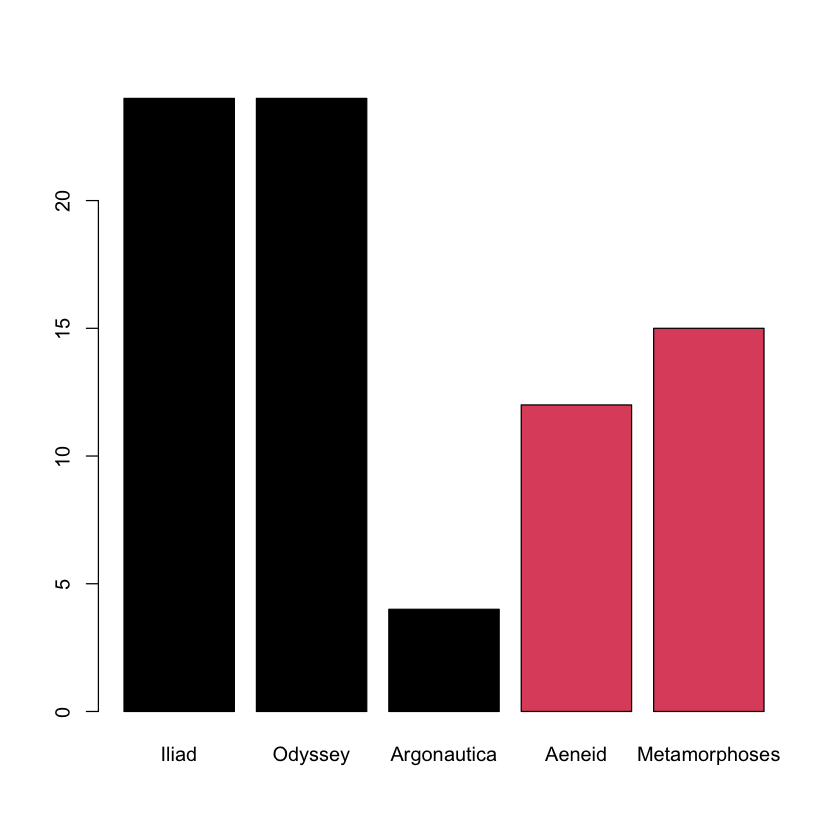

In [411]:
with(epics, barplot(books, col=language, names.arg=title))

## Importing and exporting data

Most of the time our data isn’t created in R, but imported from somewhere else. Sometimes it’s imported in a relatively raw, unstructured format, and we have to spend a lot of time finessing it into tabular strucure(s). Sometimes it’s already structured, and we just have to let R know how to parse that structure.

One of the most common forms of tabular data is delimited text, especially **comma-delimited** or **tab-delimited** values (CSV). R has built-in functions for importing this data, including some fine-tuning options to deal with varying idioms of CSV formatting.

Let’s take a look at some tabular data on direct speech in Homer’s *Iliad*, courtesy of my colleague Berenice Verhelst at the University of Amsterdam. This table contains one row for every quotation in the *Iliad* and includes information such as the speaker, addressee, and line numbers where the speech begins and ends.

If you’ve downloaded the entire workshop from GitHub, then the you can use a local path to the file:


In [422]:
speeches <- read.csv('data/iliad_speeches.csv')

In [423]:
speeches

work,book,from_line,to_line,speaker,addressee,cluster_id,cluster_part,simple_cluster_type,length,embedded_level,spkr_type
<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>
Iliad,1,17,21,Chryses,Agamemnon and Greeks,1,1,general interlocution,5,0,mortal
Iliad,1,26,32,Agamemnon,Chryses,1,2,general interlocution,7,0,mortal
Iliad,1,37,42,Chryses,Apollo,2,1,monologue,6,0,mortal
Iliad,1,59,67,Achilles,Agamemnon,3,1,general interlocution,9,0,mortal
Iliad,1,74,83,Calchas,Achilles,3,2,general interlocution,10,0,mortal
Iliad,1,85,91,Achilles,Calchas,3,3,general interlocution,7,0,mortal
Iliad,1,93,100,Calchas,Achilles,3,4,general interlocution,8,0,mortal
Iliad,1,106,120,Agamemnon,Calchas,3,5,general interlocution,15,0,mortal
Iliad,1,122,129,Achilles,Agamemnon,3,6,general interlocution,8,0,mortal
